In [1]:
import numpy as np
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.optimizers import Adamax,Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

  




Using TensorFlow backend.


In [2]:
nod = 1058          #===========no. of data points============#
k1 = np.array([0.1903934, 0.3220935, 1.559453 ])
k2byk1 = np.arange(0.50,1.05,0.05) 		#======Ratio k2byk1========#

cosalpha = np.arange(0.50,1.00,0.01)	#======cosine of the angle between the k2 and k1 arms =======#

k2byk1 = k2byk1.reshape(11,1)

costheta = -cosalpha

B_02 = np.loadtxt('bk_norm02')
params_02 = np.loadtxt('params02')


B_02 = B_02/100.

In [3]:
ind = np.loadtxt('index')
index = np.zeros(len(ind),dtype = int)
for i in range(len(ind)):
    index[i] = ind[i]
    

In [4]:
B_test = B_02[index]
B_train = np.delete(B_02,index,axis=0)

p_test = params_02[index]
p_train = np.delete(params_02,index,axis=0)

In [7]:
B_train.shape

(1040, 550)

In [ ]:
init_mode='uniform'
class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.98):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
model = Sequential()
model.add(Dense(80, input_shape=[3,], activation='elu',kernel_initializer=init_mode,))
model.add(Dense(320,activation='elu',kernel_initializer=init_mode))
model.add(Dense(460,activation='elu',kernel_initializer=init_mode))
model.add(Dense(560,activation='elu',kernel_initializer=init_mode))
model.add(Dense(260,activation='elu',kernel_initializer=init_mode))
model.add(Dense(100,activation='elu',kernel_initializer=init_mode))
model.add(Dense(320,activation='elu',kernel_initializer=init_mode))
model.add(Dense(400,activation='elu',kernel_initializer=init_mode))

    #model.add(Dropout(dropout_rate))
model.add(Dense(550, activation='linear'))
    # Compile model
optimizer = Adamax(lr=0.0001, beta_1=0.2, beta_2=0.088)
model.compile(loss='mse', optimizer=Adam, metrics=['accuracy'])



In [ ]:
model.summary()

In [ ]:
history = model.fit(p_train,B_train,validation_split=0.038,batch_size=20,epochs=2000,callbacks=[callbacks])

In [21]:
class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.98):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
model = Sequential()
model.add(Dense(80,input_shape=[3,],activation='elu'))
model.add(Dense(320,activation='elu'))
model.add(Dense(460,activation='relu'))
model.add(Dense(560,activation='elu'))
model.add(Dense(260,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(11*50))
optimizer = Adam(lr = 0.0001,)   
model.compile(loss='mse', optimizer= optimizer, metrics=['accuracy'],)


In [22]:
history = model.fit(p_train,B_train,validation_split=0.038,batch_size=10,epochs=5000,callbacks=[callbacks])

Train on 1000 samples, validate on 40 samples
Epoch 1/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 2.6795 - accuracy: 0.3070 - val_loss: 1.8972 - val_accuracy: 0.8000
Epoch 2/5000
1000/1000 [==============================] - 1s 974us/step - loss: 1.6204 - accuracy: 0.7370 - val_loss: 1.2796 - val_accuracy: 0.8000
Epoch 3/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.9445 - accuracy: 0.7330 - val_loss: 1.0889 - val_accuracy: 0.7250
Epoch 4/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7065 - accuracy: 0.7310 - val_loss: 0.9552 - val_accuracy: 0.7000
Epoch 5/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6425 - accuracy: 0.7080 - val_loss: 1.0283 - val_accuracy: 0.6750
Epoch 6/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.6990 - val_loss: 0.9180 - val_accuracy: 0.6750
Epoch 7/5000
1000/1000 [==============================] - 1s 1ms/step - loss

Epoch 112/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0273 - accuracy: 0.8900 - val_loss: 0.0434 - val_accuracy: 0.9250
Epoch 113/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0273 - accuracy: 0.9030 - val_loss: 0.0463 - val_accuracy: 0.9000
Epoch 114/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0227 - accuracy: 0.9000 - val_loss: 0.0499 - val_accuracy: 0.9000
Epoch 115/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0277 - accuracy: 0.9030 - val_loss: 0.0473 - val_accuracy: 0.9250
Epoch 116/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0565 - accuracy: 0.8900 - val_loss: 0.0730 - val_accuracy: 0.9000
Epoch 117/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0519 - accuracy: 0.8840 - val_loss: 0.0846 - val_accuracy: 0.9250
Epoch 118/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0484 - accuracy: 0.8960 - val_

1000/1000 [==============================] - 1s 978us/step - loss: 0.0161 - accuracy: 0.9420 - val_loss: 0.0742 - val_accuracy: 0.9000
Epoch 223/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0189 - accuracy: 0.9300 - val_loss: 0.0438 - val_accuracy: 0.9250
Epoch 224/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9440 - val_loss: 0.0281 - val_accuracy: 0.9250
Epoch 225/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0173 - accuracy: 0.9390 - val_loss: 0.0341 - val_accuracy: 0.9250
Epoch 226/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0142 - accuracy: 0.9460 - val_loss: 0.0362 - val_accuracy: 0.9000
Epoch 227/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.9090 - val_loss: 0.1627 - val_accuracy: 0.9000
Epoch 228/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0486 - accuracy: 0.9010 - val_loss: 0.0419 

1000/1000 [==============================] - 1s 779us/step - loss: 0.0183 - accuracy: 0.9340 - val_loss: 0.0529 - val_accuracy: 0.9250
Epoch 278/5000
1000/1000 [==============================] - 1s 795us/step - loss: 0.0180 - accuracy: 0.9390 - val_loss: 0.0877 - val_accuracy: 0.9500
Epoch 279/5000
1000/1000 [==============================] - 1s 792us/step - loss: 0.0196 - accuracy: 0.9420 - val_loss: 0.0454 - val_accuracy: 0.9250
Epoch 280/5000
1000/1000 [==============================] - 1s 840us/step - loss: 0.0157 - accuracy: 0.9420 - val_loss: 0.0227 - val_accuracy: 0.9500
Epoch 281/5000
1000/1000 [==============================] - 1s 791us/step - loss: 0.0107 - accuracy: 0.9500 - val_loss: 0.0529 - val_accuracy: 0.9250
Epoch 282/5000
1000/1000 [==============================] - 1s 789us/step - loss: 0.0143 - accuracy: 0.9500 - val_loss: 0.0202 - val_accuracy: 0.9250
Epoch 283/5000
1000/1000 [==============================] - 1s 845us/step - loss: 0.0183 - accuracy: 0.9420 - val_l

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0163 - accuracy: 0.9470 - val_loss: 0.0464 - val_accuracy: 0.9500
Epoch 333/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9430 - val_loss: 0.0303 - val_accuracy: 0.9500
Epoch 334/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0087 - accuracy: 0.9460 - val_loss: 0.0187 - val_accuracy: 0.9250
Epoch 335/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0082 - accuracy: 0.9560 - val_loss: 0.0259 - val_accuracy: 0.9500
Epoch 336/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0067 - accuracy: 0.9580 - val_loss: 0.0167 - val_accuracy: 0.9250
Epoch 337/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0073 - accuracy: 0.9480 - val_loss: 0.0251 - val_accuracy: 0.9250
Epoch 338/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0097 - accuracy: 0.9500 - val_loss: 0.0272 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0064 - accuracy: 0.9630 - val_loss: 0.0207 - val_accuracy: 0.9500
Epoch 443/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 0.9600 - val_loss: 0.0196 - val_accuracy: 0.9500
Epoch 444/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0100 - accuracy: 0.9590 - val_loss: 0.0253 - val_accuracy: 0.9250
Epoch 445/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0085 - accuracy: 0.9610 - val_loss: 0.0387 - val_accuracy: 0.9250
Epoch 446/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0262 - accuracy: 0.9570 - val_loss: 0.0542 - val_accuracy: 0.9500
Epoch 447/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0209 - accuracy: 0.9500 - val_loss: 0.0216 - val_accuracy: 0.9500
Epoch 448/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0080 - accuracy: 0.9520 - val_loss: 0.0156 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0069 - accuracy: 0.9660 - val_loss: 0.0151 - val_accuracy: 0.9250
Epoch 553/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0052 - accuracy: 0.9520 - val_loss: 0.0164 - val_accuracy: 0.9000
Epoch 554/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0142 - accuracy: 0.9470 - val_loss: 0.0311 - val_accuracy: 0.9750
Epoch 555/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0128 - accuracy: 0.9480 - val_loss: 0.0235 - val_accuracy: 0.9250
Epoch 556/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0087 - accuracy: 0.9530 - val_loss: 0.0224 - val_accuracy: 0.9250
Epoch 557/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0128 - accuracy: 0.9470 - val_loss: 0.0315 - val_accuracy: 0.9000
Epoch 558/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0122 - accuracy: 0.9540 - val_loss: 0.0405 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9710 - val_loss: 0.0116 - val_accuracy: 0.9250
Epoch 663/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 0.9740 - val_loss: 0.0111 - val_accuracy: 0.9500
Epoch 664/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9690 - val_loss: 0.0136 - val_accuracy: 0.9500
Epoch 665/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9730 - val_loss: 0.0119 - val_accuracy: 0.9250
Epoch 666/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 0.9680 - val_loss: 0.0115 - val_accuracy: 0.9250
Epoch 667/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 0.9600 - val_loss: 0.0122 - val_accuracy: 0.9000
Epoch 668/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0045 - accuracy: 0.9670 - val_loss: 0.0130 - 

1000/1000 [==============================] - 1s 936us/step - loss: 0.0139 - accuracy: 0.9500 - val_loss: 0.0196 - val_accuracy: 0.9250
Epoch 773/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0377 - accuracy: 0.9360 - val_loss: 0.0715 - val_accuracy: 0.9250
Epoch 774/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0103 - accuracy: 0.9360 - val_loss: 0.0190 - val_accuracy: 0.9250
Epoch 775/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0114 - accuracy: 0.9690 - val_loss: 0.0112 - val_accuracy: 0.9500
Epoch 776/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0073 - accuracy: 0.9610 - val_loss: 0.0111 - val_accuracy: 0.9500
Epoch 777/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0031 - accuracy: 0.9720 - val_loss: 0.0215 - val_accuracy: 0.9500
Epoch 778/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0093 - accuracy: 0.9670 - val_loss: 0.0175 

In [23]:
model.save('98bk02.h5')

In [ ]:
model.save('EmuBk0.2.h5')

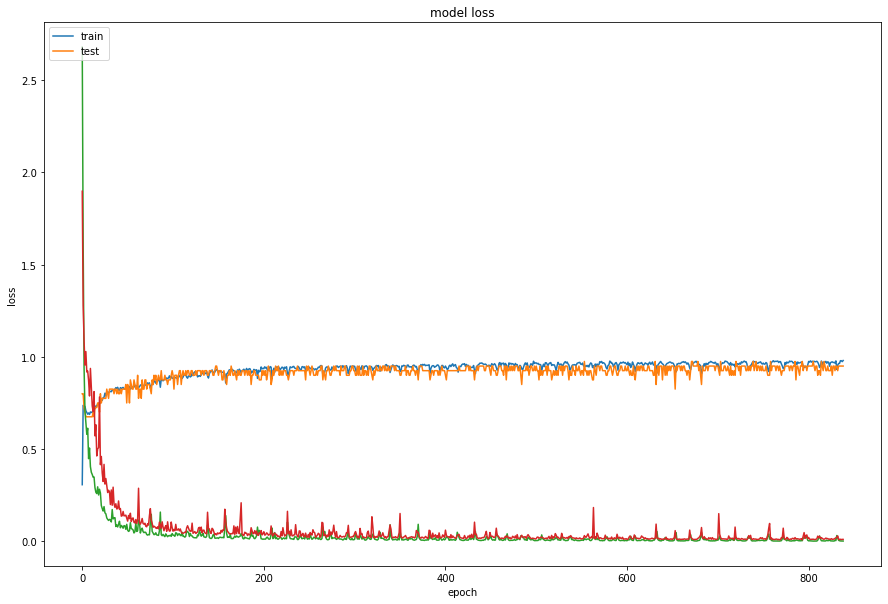

In [24]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

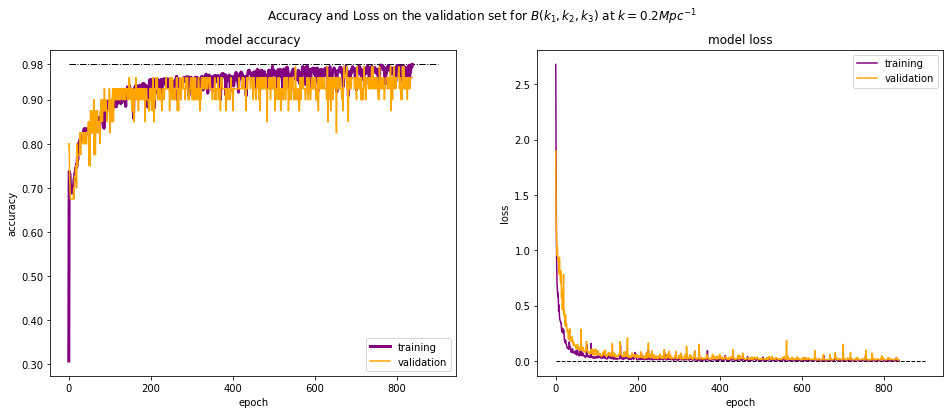

In [29]:
plt.figure(figsize=(16,6))

plt.suptitle(r'Accuracy and Loss on the validation set for $B(k_1,k_2,k_3)$ at $k =0.2Mpc^{-1}$')
plt.subplot(1,2,1)
#plt.hline()
c = list(np.arange(0,1,0.1))
c.append(0.98)
plt.yticks(c)
plt.plot(history.history['accuracy'],lw=3,color = 'purple')
plt.plot(history.history['val_accuracy'],color='orange',)
plt.hlines(y = 0.98,xmin=0,xmax=900,linestyles='dashdot',lw =1)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

# summarize history for loss
plt.subplot(1,2,2)

plt.plot(history.history['loss'],color = 'purple')
plt.plot(history.history['val_loss'],color='orange')
plt.hlines(y = 0,xmin=0,xmax=900,linestyles='dashed',lw =1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')